# Crime Analysis and Prediction : Chicago City

## Introduction

Identifying and analyzing criminal patterns plays an important role in assisting law enforcement agencies to predict and prevent criminal activity. 

We will be doing a case study on Chicago City particularly because they have made **all** of their crime data, from 2001 to the present, available to the public. This dataset is particularly interesting because of the presence of multiple variables which we will discuss later on, which will allow us to perform indepth analyses and create models to predict criminal activity.

(Dataset link here)

## Imports and Stuff

Let's start by importing the necessary libraries. We'll be using matplotlib for visualization, numpy and pandas for data structures and scikit-learn.

In [1]:
%matplotlib inline
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next, let's import the dataset! 

The source allows us to export the dataset as a CSV file (ily chicago). Note that the file size is quite big (~1.5GB) because this is data from 2001 to the present.

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6074525, 22)

There are 6,074,525 reported crimes and 22 variables. This is what the data looks like:

In [3]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,7474859,HS277131,02/17/2010 12:00:00 AM,034XX N LAKE SHORE DR,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,44.0,6.0,06,1172601.0,1923045.0,2010,02/04/2016 06:33:39 AM,41.944277,-87.640995,"(41.944276851, -87.640994899)"
1,7474860,HS277168,04/17/2010 09:00:00 PM,045XX N MAGNOLIA AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,46.0,3.0,08A,1167102.0,1930215.0,2010,02/04/2016 06:33:39 AM,41.964072,-87.661000,"(41.964071726, -87.660999944)"
2,7474861,HS276669,04/20/2010 05:00:00 PM,066XX S ELLIS AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",False,False,...,5.0,42.0,04B,1184029.0,1861256.0,2010,02/04/2016 06:33:39 AM,41.774464,-87.600929,"(41.774463738, -87.600928542)"
3,7474862,HS277284,04/16/2010 10:30:00 PM,018XX S LAWNDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,24.0,29.0,06,1151994.0,1890695.0,2010,02/04/2016 06:33:39 AM,41.855937,-87.717591,"(41.855937062, -87.717590804)"
4,7474863,HS277221,04/12/2010 05:00:00 PM,027XX S HILLOCK AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,11.0,60.0,11,1168057.0,1886521.0,2010,02/04/2016 06:33:39 AM,41.844152,-87.658752,"(41.844152005, -87.658752029)"


## Visualizing Criminal Activity

### Location

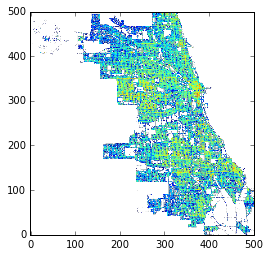

In [4]:
data_loc = data[data['X Coordinate'] > 0]
histo, xedges, yedges = np.histogram2d(np.array(data_loc['X Coordinate']), np.array(data_loc['Y Coordinate']), bins=(500,500))
plt.imshow(histo.T, origin='low', norm = LogNorm())

Now let's see the distribution of crime thoughout the city over the years.

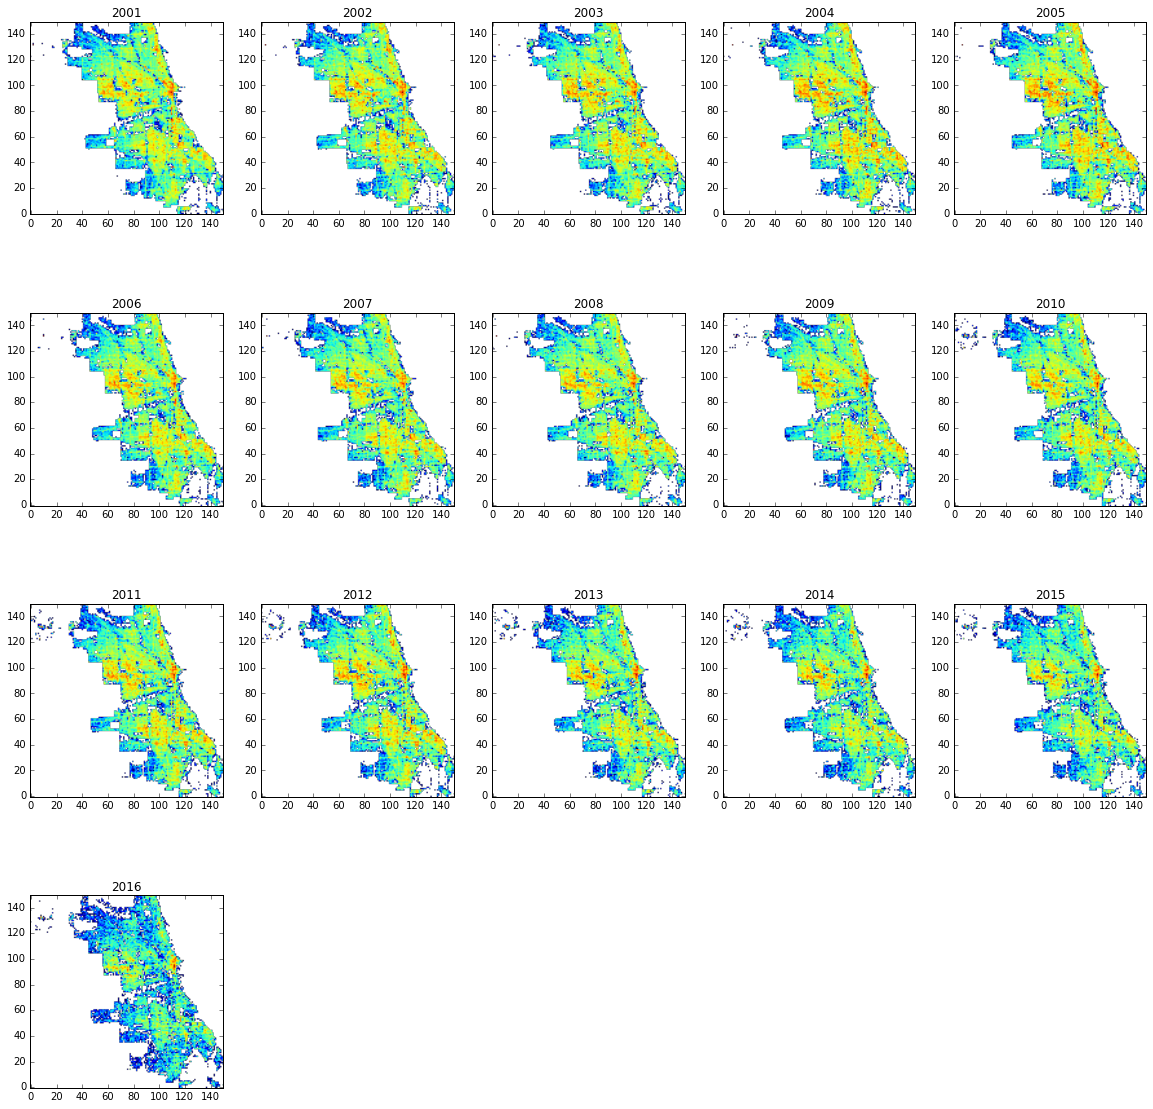

In [5]:
groups = data_loc.groupby('Year')
plt.figure(figsize = (20, 20))
ii = 1
for name, grp in groups:
    plt.subplot(4,5,ii)
    histo, xedges, yedges = np.histogram2d(np.array(grp['X Coordinate']), np.array(grp['Y Coordinate']), bins=(150,150))
    plt.imshow(histo.T, origin='low', norm = LogNorm())
    plt.title(name)
    ii+=1

### Primary Type

Now let's see the different types of crime committed.

In [76]:
data['Primary Type'].value_counts()
data['Primary Type'][data['Primary Type'] == 'NON - CRIMINAL'] = 'NON-CRIMINAL'
data['Primary Type'][data['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)'] = 'NON-CRIMINAL'

/Users/leo/Desktop/python-ml/venv/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/leo/Desktop/python-ml/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Some data clean-up:

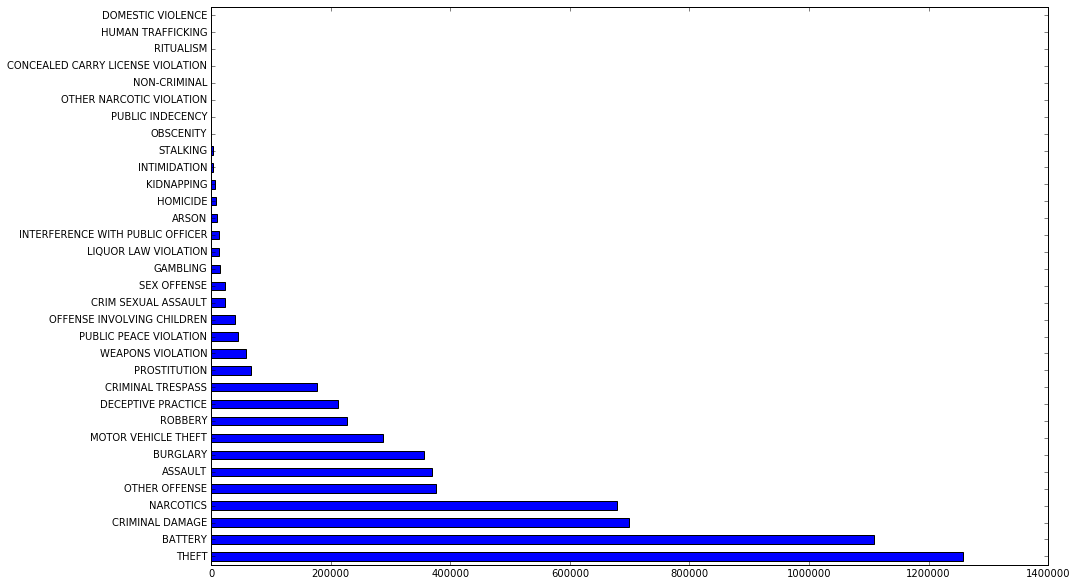

In [73]:
data['Primary Type'].value_counts().plot(kind = 'barh', figsize = (15,10))

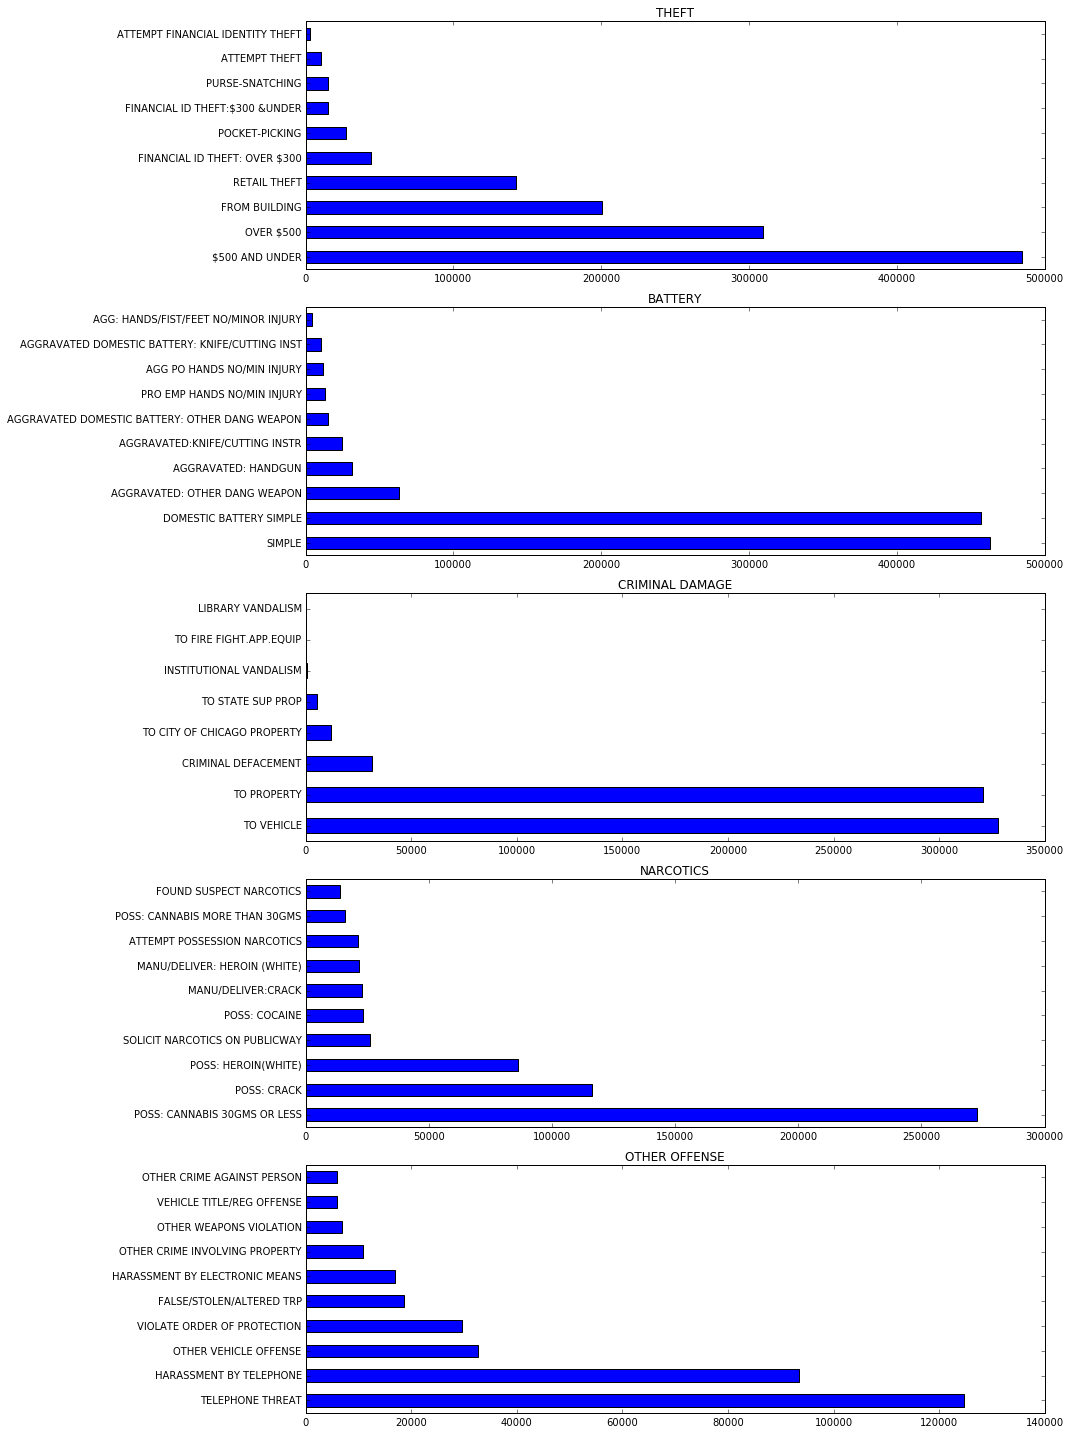

In [75]:
groups = [data[data['Primary Type'] == x] for x in data['Primary Type'].value_counts()[:5].index]
plt.figure(figsize = (15, 20))

ii = 1
for name, grp in zip(data['Primary Type'].value_counts()[:5].index,groups):
    plt.subplot(5,1,ii)
    grp['Description'].value_counts()[:10].plot(kind = 'barh')
    plt.title(name)
    ii+=1
plt.tight_layout()